# Convolutional Neural Network

c:\Users\Keerthi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1120 - loss: 2.3869 - val_accuracy: 0.0812 - val_loss: 2.3487
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1099 - loss: 2.3046 - val_accuracy: 0.1187 - val_loss: 2.3299
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1213 - loss: 2.2836 - val_accuracy: 0.0812 - val_loss: 2.3990
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1398 - loss: 2.2812 - val_accuracy: 0.0875 - val_loss: 2.3353
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1304 - loss: 2.2602 - val_accuracy: 0.0875 - val_loss: 2.3220
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2159 - loss: 2.2134 - val_accuracy: 0.1063 - val_loss: 2.3661
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1974 - loss: 2.1919 - val_accuracy: 0.1063 - val_loss: 2.3849
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2518 - loss: 2.1128 - val_accuracy: 0.0562 - val_

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

[INFO] Model architecture and weights saved successfully.


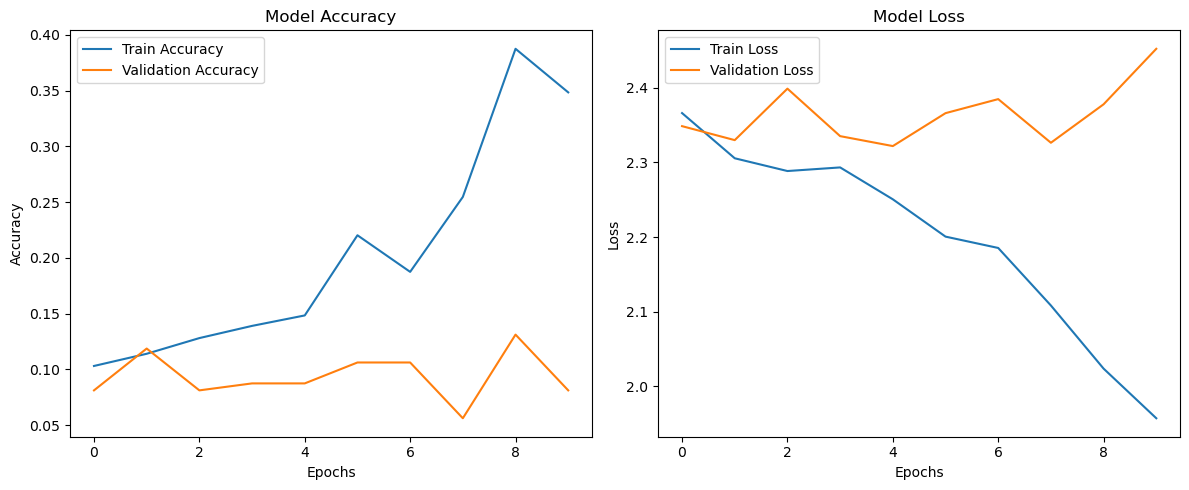

[INFO] Model loaded successfully.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1288 - loss: 2.3621  
[LOADED MODEL] Test Loss: 2.3855
[LOADED MODEL] Test Accuracy: 0.1150


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import model_from_json
import os

# ---------------------------
# 1. Generate Dummy Data
# ---------------------------
num_classes = 10
num_features = 784  # Example: flattened 28x28 image
num_samples = 1000

X = np.random.rand(num_samples, num_features).astype("float32")
y = np.random.randint(0, num_classes, num_samples)

y = keras.utils.to_categorical(y, num_classes)

# Split into train/test
train_X, test_X = X[:800], X[800:]
train_y, test_y = y[:800], y[800:]

# ---------------------------
# 2. Build Model
# ---------------------------
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(num_features,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ---------------------------
# 3. Train Model
# ---------------------------
history = model.fit(train_X, train_y, 
                    validation_split=0.2,
                    epochs=10, 
                    batch_size=32, 
                    verbose=1)

# ---------------------------
# 4. Evaluate Model
# ---------------------------
loss, accuracy = model.evaluate(test_X, test_y)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Summary
model.summary()

# ---------------------------
# 5. Save Model
# ---------------------------
os.makedirs("model", exist_ok=True)

# Save architecture
model_json = model.to_json()
with open("model/model.json", "w") as json_file:
    json_file.write(model_json)

# Save weights (IMPORTANT: must end with `.weights.h5`)
model.save_weights("model/model_weights.weights.h5")
print("[INFO] Model architecture and weights saved successfully.")

# ---------------------------
# 6. Plot Accuracy & Loss Graphs
# ---------------------------
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------
# 7. Load Model Back & Re-Evaluate
# ---------------------------
with open("model/model.json", "r") as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model/model_weights.weights.h5")
print("[INFO] Model loaded successfully.")

# Compile before evaluating
loaded_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

loss, accuracy = loaded_model.evaluate(test_X, test_y)
print(f"[LOADED MODEL] Test Loss: {loss:.4f}")
print(f"[LOADED MODEL] Test Accuracy: {accuracy:.4f}")


In [2]:
model.evaluate(test_X, test_y)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1288 - loss: 2.3621 


[2.385467767715454, 0.11500000208616257]

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)